<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Работа-с-пропусков" data-toc-modified-id="Работа-с-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Работа с пропусков</a></span></li><li><span><a href="#Удаление-столбцов" data-toc-modified-id="Удаление-столбцов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Удаление столбцов</a></span></li><li><span><a href="#Преобразуем-данные" data-toc-modified-id="Преобразуем-данные-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Преобразуем данные</a></span></li><li><span><a href="#Корреляци-данных-и-проверка-замены-пропусков" data-toc-modified-id="Корреляци-данных-и-проверка-замены-пропусков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Корреляци данных и проверка замены пропусков</a></span></li><li><span><a href="#Разделение-на-выборки" data-toc-modified-id="Разделение-на-выборки-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Разделение на выборки</a></span></li><li><span><a href="#Маштабирование-признаков" data-toc-modified-id="Маштабирование-признаков-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Маштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Изучены-модели-без-учёта-дисбаланса" data-toc-modified-id="Изучены-модели-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучены модели без учёта дисбаланса</a></span><ul class="toc-item"><li><span><a href="#accuracy" data-toc-modified-id="accuracy-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>accuracy</a></span></li><li><span><a href="#Проверка-адекватности" data-toc-modified-id="Проверка-адекватности-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Проверка адекватности</a></span></li><li><span><a href="#Матрица-ошибок" data-toc-modified-id="Матрица-ошибок-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Матрица ошибок</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # импорт для разбивки на выборки
from sklearn.preprocessing import StandardScaler # импорт для маштабирования
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score #метика accuracy
from sklearn.metrics import confusion_matrix #матрица ошибок
from sklearn.metrics import recall_score #полнота
from sklearn.metrics import precision_score #точность
from sklearn.metrics import f1_score #F-1 мера
from sklearn.metrics import roc_auc_score #AUC-ROC
from sklearn.metrics import roc_curve #ROC-кривая

from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head(),
        data.info(),
       data.isna().sum(),
       print('Дубликатов:', data.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
Дубликатов: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


None

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

None

### Описание данных

Перед нами датасет с 10 000 строк и 14 столбцами. Пропуски имеются только в столбце `Tenure` - сколько лет человек клиент в банке. 
<br>Столбец `RowNumber` - нумерует строчки, фактически повторяет информацию самого ДатаФрейма, для обучения модели не нужен.
<br>`CustomerId` - идентификатор клиента, так же для обучения модели не потребуется.
<br>`Surname` - Фамилия клиента, для обучения модели непотребуется.

столбец `Exited` — факт ухода клиента - Целевой признак, категориальный признак, значит подойдет методами классификации.

In [3]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

`Geography` - столбец имеет 3 уникальных наименования, можно преобразовать техникой OHE
<br> `Gender`  — так же нужно будет преобразовать OHE
<br> Все типы данных соответствуют нашим задачам
<br> для уменьшения ошибок и удобства записи кода переведу названия столбцов в нижний регистр

In [4]:
data.columns = [x.lower() for x in data.columns]

### Работа с пропусков

In [5]:
data['tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [6]:
data.isna().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [7]:
#data['tenure'] = data['tenure'].fillna(data['tenure'].median())# заменю пропуски на медианное число, так как неизвестна причина пропусков

In [8]:
data.duplicated().sum()# проверка наличия дубликатов

0

### Удаление столбцов

In [9]:
data_new = data.drop({'rownumber','customerid', 'surname'}, axis=1)
data_new.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [10]:
data_new.shape

(10000, 11)

### Преобразуем данные 
техникой OHE, что бы использовать модели: деревое решений, случайный лес и логистическую регрессию.

In [11]:
data_new = pd.get_dummies(data_new, columns = ['geography', 'gender'],drop_first=True)# удалив первые столбцы преобразованных данных, что бы избежать дамми-ловушки
data_new.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


### Корреляци данных и проверка замены пропусков

In [12]:
data_new.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
creditscore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761,-0.003299,0.000810,0.012634
balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
numofproducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
hascrcard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
isactivemember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
estimatedsalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
exited,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
geography_Germany,0.005538,0.046897,-0.003299,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


По корреляции видно что многие элементы таблицы имеют слабое влияние на целевой признак `exited`, есть с отрицательной и положительной корреляцией, столбец с пропусками `tenure` - имеет очень слабую отрицательную корреляцию, проэтому проверю замену пропусков в нем двумя способами на модели случайного леса и сравню параметры

In [13]:
df_tenure_0 = data_new
df_tenure_median = data_new

In [14]:
df_tenure_0['tenure'] = df_tenure_0['tenure'].fillna(0)
df_tenure_median['tenure'] = df_tenure_median['tenure'].fillna(df_tenure_median['tenure'].median())


In [15]:
def test_model(data):

    features = data_new.drop('exited', axis=1)
    target = data_new['exited']
    features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                    target,
                                                    train_size=0.7,
                                                    random_state=12345, 
                                                    stratify=target)
    numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary'] # фиксируем численные признаки
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    model = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    f1_mera = f1_score(target_valid, prediction)
    auc_roc = roc_auc_score(target_valid, prediction)
    return (f1_mera, auc_roc)

In [16]:
print("Параметры F1-меры и AUC-ROC при замене на 0: ", test_model(df_tenure_0))
print("Параметры F1-меры и AUC-ROC при замене на медиану: ",test_model(df_tenure_median))

Параметры F1-меры и AUC-ROC при замене на 0:  (0.5668341708542713, 0.7094213864829186)
Параметры F1-меры и AUC-ROC при замене на медиану:  (0.5668341708542713, 0.7094213864829186)


Метрики не отличаются, значит пропуски можно заменить любым способом

In [17]:
data_new['tenure'] = data_new['tenure'].fillna(data_new['tenure'].median())

In [18]:
data_new['tenure'].corr(data_new['exited'])

-0.013319236197946805

Заменив пропуски, проверив корреляцию между данными столбцами видно, что она изменилась на 0,003 

### Разделение на выборки
Так как дополнительно не предоставлена тестовая выборка, необходимо поделить данные на 3 выборки:
- обучающую
- валидационную
- тестовую

In [19]:
features = data_new.drop('exited', axis=1)
target = data_new['exited']

In [20]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345, 
                                                    stratify=target)
# выделил 60% данных на тренировочную выборку, остальные данные разделю поровну между валидационнрй и тестовой

In [21]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test,
                                                    target_valid_test,
                                                    train_size=0.5,
                                                    random_state=12345, 
                                                    stratify=target_valid_test)

In [22]:
display(features_train.shape,
       features_valid.shape,
       features_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)

- 6000 в тренировочной выборки
- 2000 в валидационной
- 2000 в тестовой

### Маштабирование признаков

Маштабирование данных необходимо, так как все численные признаки имеют разную величину числа

In [23]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary'] # фиксируем численные признаки
scaler = StandardScaler()
scaler.fit(features_train[numeric]) # обучаем на тренировочной выборке

StandardScaler()

In [24]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()
# маштабируем численные признаки в тренировочной выборке

/tmp/ipykernel_717/1320290043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
2837,-1.040434,0.953312,0.467449,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-1.461501,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.110432,0.481608,0.820981,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-1.461501,0.088439,-0.914708,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.140009,0.879129,-0.914708,1,0,0.113236,0,0,0


In [25]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()
# маштабируем численные признаки в валидационной выборке

/tmp/ipykernel_717/997885763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[numeric] = scaler.transform(features_valid[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
6612,-1.524838,2.383160,-0.497026,1.011655,-0.914708,0,1,0.010275,0,0,0
519,0.587990,1.811221,0.467449,0.213192,-0.914708,0,1,0.453089,0,0,1
1609,-0.318980,-0.381213,1.110432,0.893896,-0.914708,1,0,-0.603508,0,0,0
3475,1.226991,-0.762506,-0.175534,-0.240363,0.820981,1,1,-1.621460,0,0,1
2707,-0.133464,-0.095244,-0.497026,0.447305,-0.914708,0,0,0.338574,0,0,0


In [26]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()
# маштабируем численные признаки в тестовой выборке

/tmp/ipykernel_717/292098413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
657,-0.504497,1.429928,-1.140009,0.873883,0.820981,1,1,1.725255,1,0,0
2083,-1.195031,-1.429769,-1.140009,-1.219673,-0.914708,1,1,1.203665,0,0,1
3234,-1.267176,0.762665,-1.140009,-1.219673,-0.914708,1,0,-1.374743,0,0,1
1551,0.825039,1.239281,0.788940,-1.219673,0.820981,0,1,0.382306,0,1,0
2344,0.660135,0.953312,-0.175534,0.267087,-0.914708,1,0,-1.613578,1,0,0


## Исследование задачи

### Баланс классов

In [27]:
target_train.value_counts(normalize = 1)

0    0.796333
1    0.203667
Name: exited, dtype: float64

In [28]:
target_valid.value_counts(normalize = 1)

0    0.796
1    0.204
Name: exited, dtype: float64

В обучающей и валидационной выборке идет дисбаланс данных, ответов `0` - 80%, `1` - 20%
<br>Модель будет делать предсазания чаще всего в сторону одного ответа

### Изучены модели без учёта дисбаланса

#### accuracy

In [29]:
model_tree=DecisionTreeClassifier(random_state=123)
model_tree.fit(features_train, target_train)
predic_tree = model_tree.predict(features_valid)
f1_m_tree = f1_score(target_valid, predic_tree)
roc_acc_tree = roc_auc_score(target_valid, predic_tree)

In [30]:
model_rfc = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_rfc.fit(features_train, target_train)
predic_rfc = model_rfc.predict(features_valid)
f1_m_rfc = f1_score(target_valid, predic_rfc)
roc_acc_rfc = roc_auc_score(target_valid, predic_rfc)

In [31]:
model_logreg = LogisticRegression(solver = 'liblinear')
model_logreg.fit(features_train, target_train)
predic_logreg = model_logreg.predict(features_valid)
f1_m_logreg = f1_score(target_valid, predic_logreg)
roc_acc_logreg = roc_auc_score(target_valid, predic_logreg)

    Сравним F1 и AUC-ROC с константной моделью

#### Проверка адекватности

In [32]:
target_predict_constant = pd.Series([0]*len(target_valid)) # за константу берем ответы 0, так как их 80%
target_predict_constant.shape # проверка себя

(2000,)

In [33]:
f1_m_constant = f1_score(target_valid, target_predict_constant)
roc_acc_constant = roc_auc_score(target_valid, target_predict_constant)

In [34]:
print("F1 и AUC-ROC модели дерева: ", f1_m_tree , roc_acc_tree)
print("F1 и AUC-ROC случайного леса: ", f1_m_rfc, roc_acc_rfc)
print("F1 и AUC-ROC логистческой регрессии", f1_m_logreg, roc_acc_logreg)
print('F1 и AUC-ROC константной модели: ',f1_m_constant, roc_acc_constant)

F1 и AUC-ROC модели дерева:  0.5130641330166271 0.696238545669524
F1 и AUC-ROC случайного леса:  0.6103703703703703 0.7332926889348704
F1 и AUC-ROC логистческой регрессии 0.3076923076923077 0.5859813774756133
F1 и AUC-ROC константной модели:  0.0 0.5


<br> **Метрики логическо регрессии:**
  - AUC-ROC = 0,58 близка к константной модели
  - F1 = 0.3 очень мала
<br> **Метрики дерева решений:**
  - AUC-ROC = 0,69 
  - F1 = 0.51
<br> **Метрики случайного леса:**
  - AUC-ROC = 0,73 
  - F1 = 0.61
**Случайный лес и дерево решений дают хорошие показатели, но фаворит все же модель Случайного леса**

#### Матрица ошибок

Обратимся к матрице ошибок для каждой модели, что бы разобраться в ситуации

In [35]:
confusion_matrix(target_valid, predic_tree)

array([[1374,  218],
       [ 192,  216]])

In [36]:
def rec_prec_f1(target_valid, prediction):
    print("Матрица ошибок:", '\n', confusion_matrix(target_valid, prediction))
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, prediction))

In [37]:
print("модель Дерева") 
rec_prec_f1(target_valid, predic_tree)

модель Дерева
Матрица ошибок: 
 [[1374  218]
 [ 192  216]]
Полнота 0.5294117647058824
Точность 0.4976958525345622
F1-мера 0.5130641330166271
AUC-ROC 0.696238545669524


Модель предсказывает качественные негативные ответы в больших случаях, в остальных случаях FP, TP, FN, выдаются практически с равной долей
<br>Низкий показатель метрики F1 - 0.5, свидетельствует о низком качестве модели, нехватает точности

In [38]:
print("модель Случайного леса") 
rec_prec_f1(target_valid, predic_rfc)

модель Случайного леса
Матрица ошибок: 
 [[1531   61]
 [ 202  206]]
Полнота 0.5049019607843137
Точность 0.7715355805243446
F1-мера 0.6103703703703703
AUC-ROC 0.7332926889348704


Модель выдает качественные негативные ответы в больших случаях, в остальных случаях TP, FN, выдаются с равной долей и преобладают над FP
<br>Низкий показатель метрики F1 - 0.6, свидетельствует о низком качестве модели, нехватает точности

In [39]:
print("модель Логической регресии") 
rec_prec_f1(target_valid, predic_logreg)

модель Логической регресии
Матрица ошибок: 
 [[1538   54]
 [ 324   84]]
Полнота 0.20588235294117646
Точность 0.6086956521739131
F1-мера 0.3076923076923077
AUC-ROC 0.5859813774756133


Для логической регресии посчитаем метрику AUC-ROC

In [40]:
logreg_probabilities_one_valid = model_logreg.predict_proba(features_valid)[:, 1]

auc_roc_logreg = roc_auc_score(target_valid, logreg_probabilities_one_valid)

auc_roc_logreg

0.787586831214898

Acc 0.811


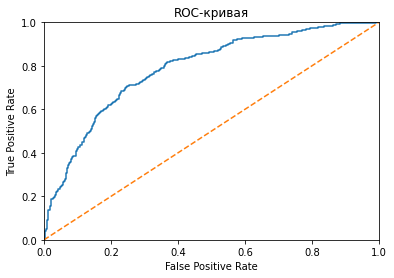

In [41]:
print("Acc", model_logreg.score(features_valid, target_valid))
fpr, tpr, thresholds = roc_curve(target_valid, logreg_probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Проверим метрику на сбалансированной выборке**

Acc 0.7325
AUC-ROC 0.7937758646172037


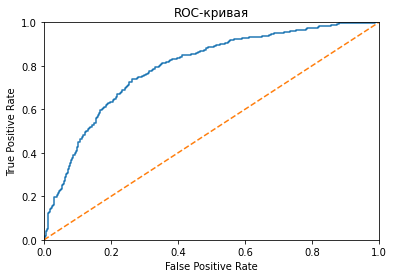

In [42]:
model_logreg = LogisticRegression(solver = 'liblinear', class_weight='balanced')
model_logreg.fit(features_train, target_train)
logreg_probabilities_one_valid_weight = model_logreg.predict_proba(features_valid)[:, 1]
print("Acc", model_logreg.score(features_valid, target_valid))
print("AUC-ROC", roc_auc_score(target_valid, logreg_probabilities_one_valid_weight))

fpr, tpr, thresholds = roc_curve(target_valid, logreg_probabilities_one_valid_weight) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Показатели не сильно улучшились, точность упала
Логическая регрессия показывает максимальную точность в предсказании отрицательных ответов, это получается из-за того, что в выборке доля таких ответов - 80%

In [43]:
table_comp_f1 = []
table_comp_auc_roc = []

In [44]:
table_comp_f1.append(f1_m_tree)
table_comp_f1.append(f1_m_rfc)
table_comp_f1.append(f1_m_logreg)
table_comp_auc_roc.append(roc_acc_tree)
table_comp_auc_roc.append(roc_acc_rfc)
table_comp_auc_roc.append(roc_acc_logreg)

In [45]:
table_comp_f1

[0.5130641330166271, 0.6103703703703703, 0.3076923076923077]

In [46]:
table_comp = pd.DataFrame(data = (table_comp_f1,table_comp_auc_roc),
                          index = ['F1', ' AUC_ROC'],
                          columns =['Tree', 'Forest', 'LogReg'])
table_comp

,Tree,Forest,LogReg
F1,0.513064,0.610370,0.307692
AUC_ROC,0.696239,0.733293,0.585981


**Из 3 моделей луше всего показывает случайный лес, показатель метрики F1-мера самый высокий - 0,61
<br> Логическая регрессиия не дает хорошего результата в данном случаи, при выделении класса, показатель AUC-ROC почти не меняется, а качество модели accuracy - падает
<br> модель дерева показывает средние результаты, которые тоже не высоки F1-мера=0.51
AUC-ROC=0.69**

## Борьба с дисбалансом

В данных сообношение классов 80% - `0`, к 20% - `1`, что бы убрать дисбаланс между классами, будем увеличивать количество положительных ответов.

In [47]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345) #перемешаем, что бы модель нормально обучалась
    
    return features_upsampled, target_upsampled

In [48]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4) 
# увеличем 1 класс в 4 раза, что бы сравнять их количество

In [49]:
features_upsampled.shape

(9666, 11)

Обучим наши модели на новых данных

In [50]:
model_tree_balans=DecisionTreeClassifier(random_state=123)
model_tree_balans.fit(features_upsampled, target_upsampled)
predic_tree_balans = model_tree_balans.predict(features_valid)
f1_m_tree_balans = f1_score(target_valid, predic_tree_balans)
roc_acc_tree_balan = roc_auc_score(target_valid, predic_tree_balans)

In [51]:
model_rfc_balans = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_rfc_balans.fit(features_upsampled, target_upsampled)
predic_rfc_balans = model_rfc_balans.predict(features_valid)
f1_m_rfc_balans = f1_score(target_valid, predic_rfc_balans)
roc_acc_rfc_balan = roc_auc_score(target_valid, predic_rfc_balans)

In [52]:
model_logreg_balans = LogisticRegression(solver = 'liblinear')
model_logreg_balans.fit(features_upsampled, target_upsampled)
predic_logreg_balans = model_logreg_balans.predict(features_valid)
f1_m_logreg_balans = f1_score(target_valid, predic_logreg_balans)
roc_acc_logreg_balan = roc_auc_score(target_valid, predic_logreg_balans)

In [53]:
table_comp_f1.append([f1_m_tree_balans,f1_m_rfc_balans,f1_m_logreg_balans])


In [54]:
table_comp['Tree_balans'] = [f1_m_tree_balans, roc_acc_tree_balan]
table_comp['Forest_balans'] = [f1_m_rfc_balans, roc_acc_rfc_balan]
table_comp['LogReg_balans'] = [f1_m_logreg_balans, roc_acc_logreg_balan]

In [55]:
table_comp

,Tree,Forest,LogReg,Tree_balans,Forest_balans,LogReg_balans
F1,0.513064,0.610370,0.307692,0.520446,0.605820,0.524675
AUC_ROC,0.696239,0.733293,0.585981,0.697994,0.743263,0.731876


Показатели всех 3 моделий изменились, несильно
<br> Логическая регрессия улучшила данные, но F1 всего 0,5
<br> Случайный лес уменьшил F1 до 0,60, но увеличил AUC-ROC до 0,74
<br> модель Дерева почти не изменила свои показатели

Лучшие показатели у случайного леса F1-мера - `0,605`, AUC-ROC - `0.74`. Попробуем подобрать гиперпараметры для улучшения модели

На сбалансированных данных метрики моделей сильно не поменялись, у Логической регресии показатель F1 - стал выше(было 0.3, стало 0.52), так как лучшие показатели среди 3 моделей у случайного леса (F1-мера=0.605 и AUC-ROC=0.743)
дальше я стал настраивать модель гиперпараметрами, для улучшения показателей.

In [56]:
%%time
best_model_forest = None
best_result = 0
best_auc_roc = 0
best_est = 0
best_depth = 0
table_est = []
table_depth = []
f1 = []



for est in range(70, 100, 2): # обрезал выборку с 70 до 100, что бы не зависал код на долго
    for depth in range (5, 10): # так же обрезал выборку глубины 
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled) 
        prediction = model.predict(features_valid)
        result = f1_score(target_valid, prediction) 
        auc_roc = roc_auc_score(target_valid, prediction)
        f1.append(result)
        table_est.append(est)
        table_depth.append(depth)
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_auc_roc = auc_roc
            best_est = est
            best_depth = depth

#print("F1-мера наилучшей модели на валидационной выборке:", best_result)
#print("Количество деревьев:", best_est,)
#print("Максимальная глубина:", best_depth)
best_forest = pd.DataFrame(data = (best_est, best_depth, best_result, best_auc_roc))
best_forest.index = ('Est', 'Depth', 'F1-мера', 'AUC-ROC')

table_1 = pd.DataFrame(data = (table_est, table_depth, f1)).T
table_1.columns = ('table_est', 'table_depth', 'f1')
display(table_1.pivot_table(index = ['table_depth'], columns = ['table_est']))
print()
print("Лучшие показатели:")
display(best_forest)

f1                                                    \
table_est        70.0      72.0      74.0      76.0      78.0      80.0   
table_depth                                                               
5.0          0.615825  0.612750  0.613636  0.616412  0.614653  0.613918   
6.0          0.622919  0.623402  0.622179  0.625984  0.623402  0.624631   
7.0          0.631365  0.634146  0.631579  0.632114  0.630193  0.630832   
8.0          0.627207  0.624481  0.627207  0.631579  0.632231  0.630278   
9.0          0.642857  0.640693  0.644324  0.641387  0.637931  0.639397   

                                                                         \
table_est        82.0      84.0      86.0      88.0      90.0      92.0   
table_depth                                                               
5.0          0.614943  0.615091  0.616123  0.616123  0.614354  0.614943   
6.0          0.625369  0.628684  0.625490  0.627335  0.627102  0.624631   
7.0          0.629328  0.628049  0.629213  0.629328  0.626016  0.628688   
8.0          0.629630  0.630052  0.630705  0.632124  0.633643  0.633540   
9.0          0.640777  0.637931  0.635091  0.635776  0.638024  0.637339   

                                           
table_est        94.0      96.0      98.0  
table_depth                                
5.0          0.615532  0.618774  0.621154  
6.0          0.625369  0.627953  0.625247  
7.0          0.630081  0.629969  0.630722  
8.0          0.633643  0.631470  0.634197  
9.0          0.637244  0.640086  0.642320


Лучшие показатели:


,0
Est,74.000000
Depth,9.000000
F1-мера,0.644324
AUC-ROC,0.796415


CPU times: user 37.3 s, sys: 105 ms, total: 37.4 s
Wall time: 37.4 s


In [57]:
best_model_prediction = best_model_forest.predict(features_valid)
rec_prec_f1(target_valid, best_model_prediction)

Матрица ошибок: 
 [[1373  219]
 [ 110  298]]
Полнота 0.7303921568627451
Точность 0.5764023210831721
F1-мера 0.6443243243243243
AUC-ROC 0.7964146713961967


На сбалансированных данных метрики моделей сильно не поменялись, у Логической регресии показатель качества accuracy - стал ниже константной (0,725 к 0,76), так как лучшие показатели среди 3 моделей у случайного леса (F1-мера=0.6126 и
AUC-ROC=0.7351)
<br>дальше я стал настраивать модель гиперпараметрами, для улучшения показателей.
Удалось повысить площадь под кривой AUC-ROC до 0,79 и поднять F1-меру до 0,643.
Проверим модель с гиперпараметрами на тестовой выборке

## Тестирование модели

In [58]:
model_test_prediction = best_model_forest.predict(features_test)
rec_prec_f1(target_test, model_test_prediction)

Матрица ошибок: 
 [[1356  237]
 [ 124  283]]
Полнота 0.6953316953316954
Точность 0.5442307692307692
F1-мера 0.610571736785329
AUC-ROC 0.7732779003965444


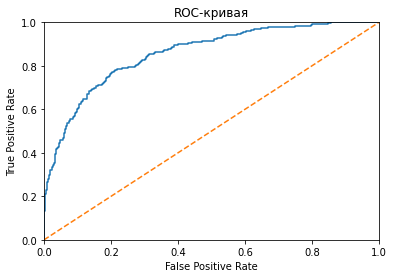

In [59]:
rfc_probabilities_one_test = best_model_forest.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, rfc_probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [60]:
best_predic_rfc = best_model_forest.predict(features_test)
acc_rfc = accuracy_score(target_test, best_predic_rfc)
print('Качество модели: ',acc_rfc)

Качество модели:  0.8195


**Новый вывод:**

In [61]:
table_comp

,Tree,Forest,LogReg,Tree_balans,Forest_balans,LogReg_balans
F1,0.513064,0.610370,0.307692,0.520446,0.605820,0.524675
AUC_ROC,0.696239,0.733293,0.585981,0.697994,0.743263,0.731876


Видно что F1 и AUC-Roc сильно меняются только в модели Логической Регрессии, у Модели Дерева и Случайного леса эти показатели слабо реагируют на сбалансированные данные. Имея лучшие показатели не в "прокаченной модели" у Случайного леса  - F1 = 0.605 и AUC-ROC = 0.743. Подобрав лучшие гиперпараметры на выходе вышло улучшить данные.

In [62]:
best_forest

,0
Est,74.000000
Depth,9.000000
F1-мера,0.644324
AUC-ROC,0.796415


Случайный лес с параметрами max_depth=9, n_estimators=74 составил F1=0,644, AUC-ROC=0.796

In [63]:
rec_prec_f1(target_test, model_test_prediction)

Матрица ошибок: 
 [[1356  237]
 [ 124  283]]
Полнота 0.6953316953316954
Точность 0.5442307692307692
F1-мера 0.610571736785329
AUC-ROC 0.7732779003965444


**Вывод**
<br> По итогу моих действий мне удалось на `тестовой выборке` достигнуть 
<br>F1 = 0,61 
<br>AUC-ROC = 0,77 - показывает что модель достаточно хорошо предсказывает то, что клиент останется клиентом банка
<br>Показатель полноты модели = 0,69 - говорит о том, что модель способна предсказать уход клиента с высокой долей вероятности
Показатель точности = 0,54 - обьясняет то, что модель только в 54% верно предскажет действия клиентов.
Данная модель поможет предсказать останется ли человек клиентом банка.
